Importing libraries

In [ ]:
#All the libralies used in this project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

Loading the data.

In [ ]:
dataset = pd.read_csv('/content/diamonds.csv')

In [ ]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
dataset.shape

(53940, 11)

Checking for the dataset's columns data type

In [ ]:
dataset.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


The dtype are as follows:

Two are integers

Six are float type

Three are object type

Checking for Nan (Null) values.

In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


**There aren't any missing values in any column**

Drop the unnamed : 0 column because it has no value in our dataset

In [ ]:
dataset.drop(columns=dataset.columns[0],inplace=True)

Dropping the non 3-D diamonds. (error)

In [ ]:

dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)
dataset.shape

(53920, 10)

In [ ]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


>>> Encoding the data.

In [ ]:
dataset['cut'].value_counts()

,count
cut,
Ideal,21548
Premium,13780
Very Good,12081
Good,4902
Fair,1609


In [ ]:
ord_data_cut = [['Fair','Good','Very Good','Premium','Ideal']]
oe_cut = OrdinalEncoder(categories=ord_data_cut)
dataset['cut'] = oe_cut.fit_transform(dataset[['cut']])

0 --> Fair

1 --> Good

3 --> Very Good

4 --> Premium

5 --> Ideal

In [ ]:
dataset['color'].value_counts()

,count
color,
G,11284
E,9797
F,9538
H,8298
D,6774
I,5421
J,2808


In [ ]:
ord_data_color = [['D','E','F','G','H','I','J']]
oe_color = OrdinalEncoder(categories=ord_data_color)
dataset['color'] = oe_color.fit_transform(dataset[['color']])

Alphabets are in order from 0-6 index

In [ ]:
dataset['clarity'].value_counts()

,count
clarity,
SI1,13063
VS2,12254
SI2,9185
VS1,8170
VVS2,5066
VVS1,3654
IF,1790
I1,738


In [ ]:
ord_data_clarity = [["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"]]
oe_clarity = OrdinalEncoder(categories=ord_data_clarity)
dataset['clarity'] = oe_clarity.fit_transform(dataset[['clarity']])

0 --> SI1

1 -->VS2

2 --> SI2

3 --> VS1

4 --> VVS2

5 --> VVS1

6 --> IF

7 --> I1

**Data visualization**

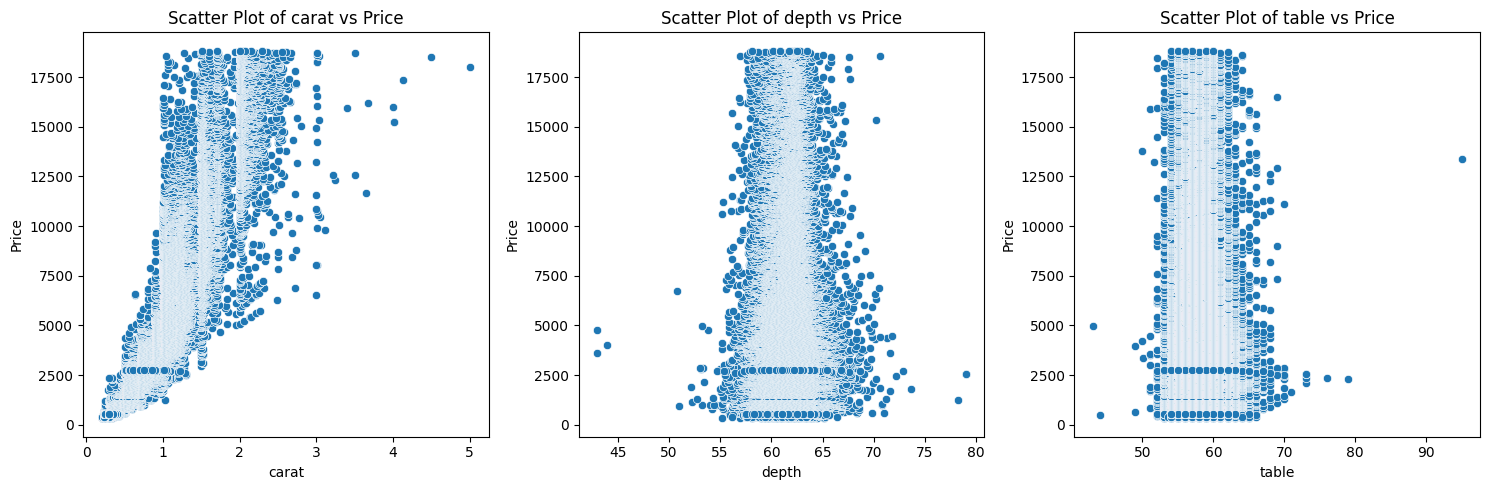

In [ ]:
arr = arr = ['carat','depth', 'table']
# Create subplots
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through the features and create scatter plots
for i, feature in enumerate(arr):
    sns.scatterplot(data=dataset, x=feature, y='price', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='z', ylabel='Density'>

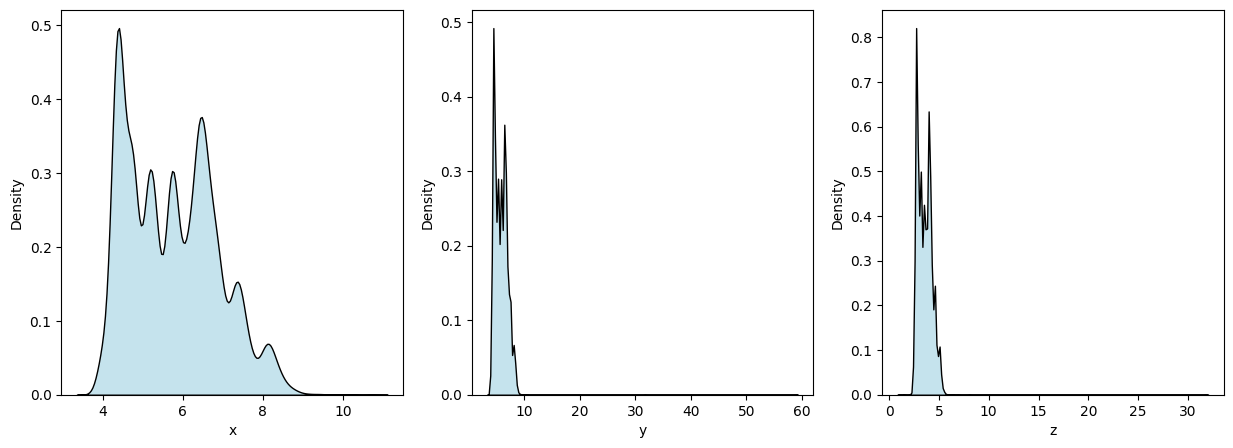

In [ ]:
fig1,axes1 = plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(dataset["x"] , fill = True , color = "lightblue" , edgecolor = "Black" , alpha = 0.7 , ax = axes1[0])
sns.kdeplot(dataset["y"] , fill = True , color = "lightblue" , edgecolor = "Black" , alpha = 0.7 , ax = axes1[1])
sns.kdeplot(dataset["z"] , fill = True , color = "lightblue" , edgecolor = "Black" , alpha = 0.7 , ax = axes1[2])

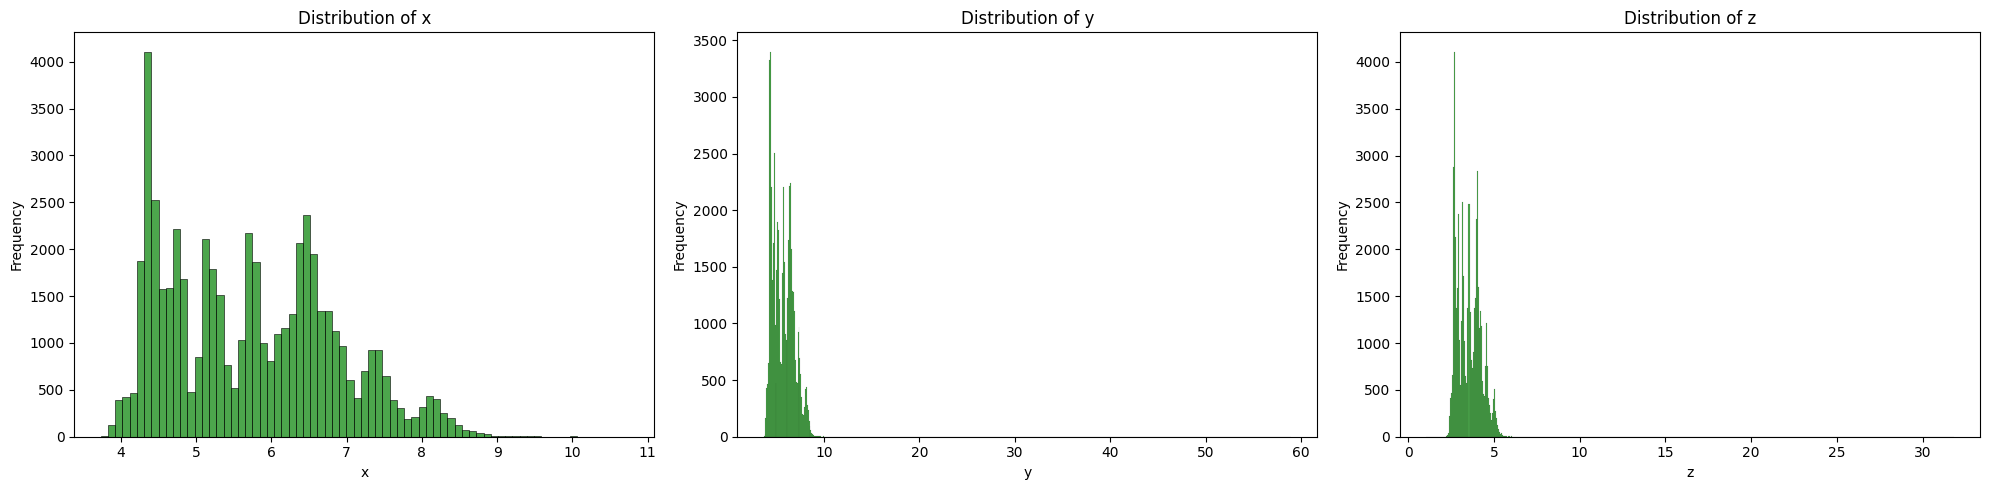

In [ ]:
arr_dimension = ["x","y","z"]
fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))

# Create distribution plots for x, y, and z
for j, i in enumerate(arr_dimension):
    sns.histplot(dataset[i], fill=True, color="green", edgecolor="black", alpha=0.7, ax=axes1[j])
    axes1[j].set_title(f"Distribution of {i}")
    axes1[j].set_xlabel(i)
    axes1[j].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
plt.show()

**Outliner removal**



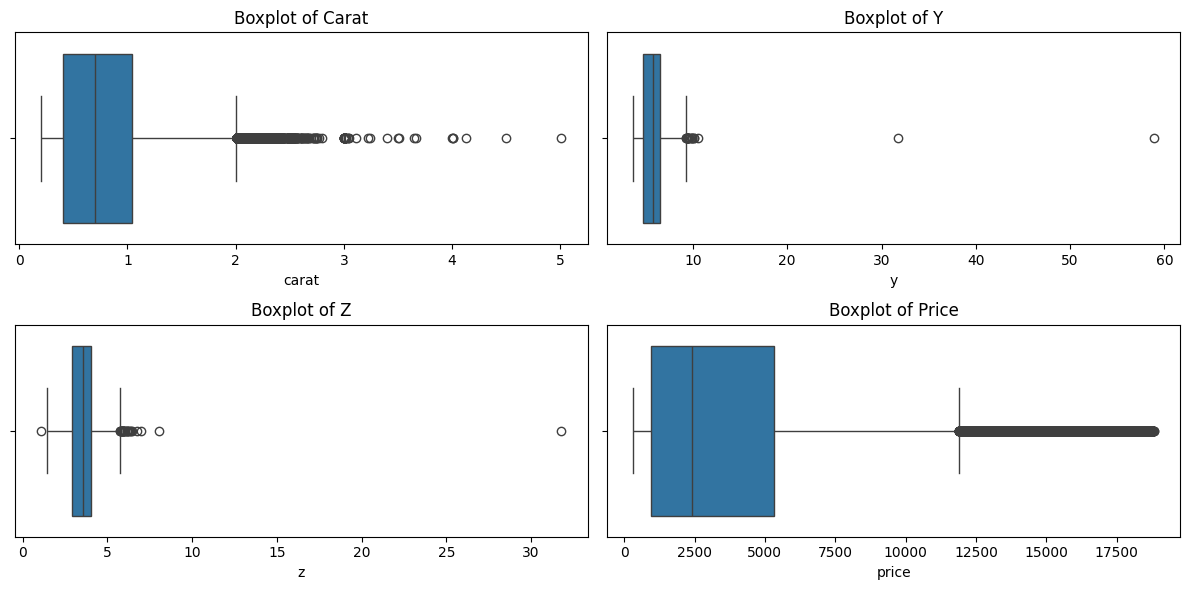

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot(x='carat', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Carat')

sns.boxplot(x='y', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Y')

sns.boxplot(x='z', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Z')

sns.boxplot(x='price', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Price')

plt.tight_layout()
plt.show()

###Using Feature transformation

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
ft = FunctionTransformer(np.log1p)

In [ ]:
ft.fit(dataset[['carat']])
dataset['carat'] = ft.transform(dataset[['carat']])

In [ ]:
ft.fit(dataset[['price']])
dataset['price'] = ft.transform(dataset[['price']])

###Using IQR to removing the outliers

In [ ]:
arr = ['carat','y','z','price']
for i in arr:
  q1 = dataset[i].quantile(0.25)
  q3 = dataset[i].quantile(0.75)
  iqr = q3 - q1
  min = q1 - (1.5 * iqr)
  max = q3 + (1.5 * iqr)
  dataset = dataset[(dataset[i] >= min) & (dataset[i] <= max)]

In [ ]:
#Checking and delting any duplicate data.
dataset.drop_duplicates(inplace = True)

In [ ]:
dataset.shape

(53703, 10)

>>**Data vizualiztion after data cleaning**

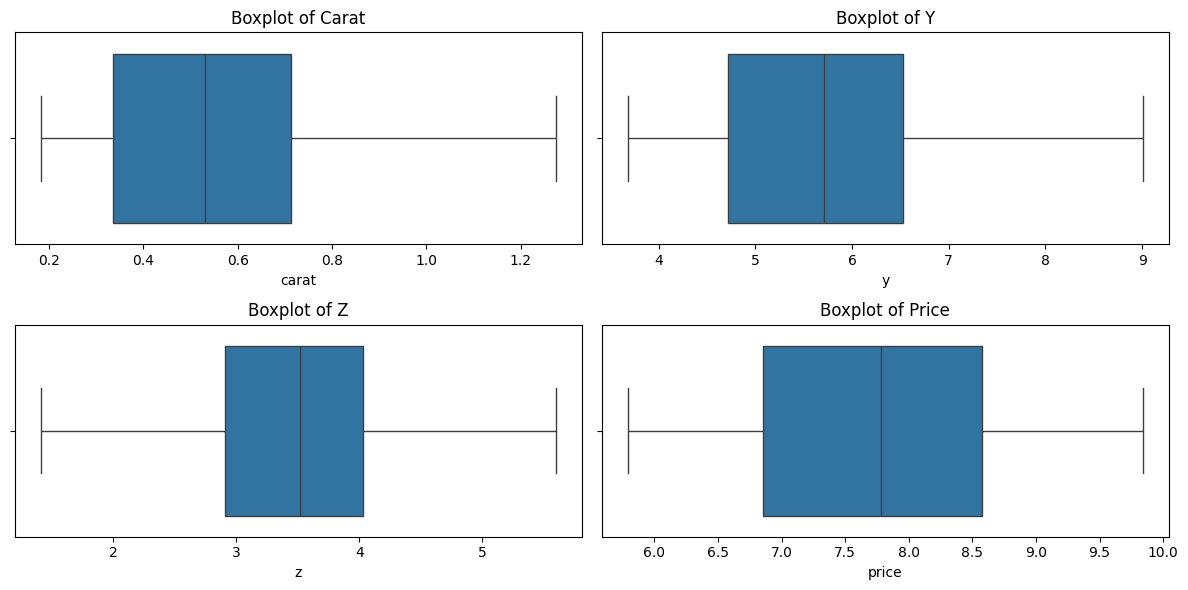

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.boxplot(x='carat', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Carat')

sns.boxplot(x='y', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Y')

sns.boxplot(x='z', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Z')

sns.boxplot(x='price', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Price')

plt.tight_layout()
plt.show()

<Axes: xlabel='z', ylabel='Density'>

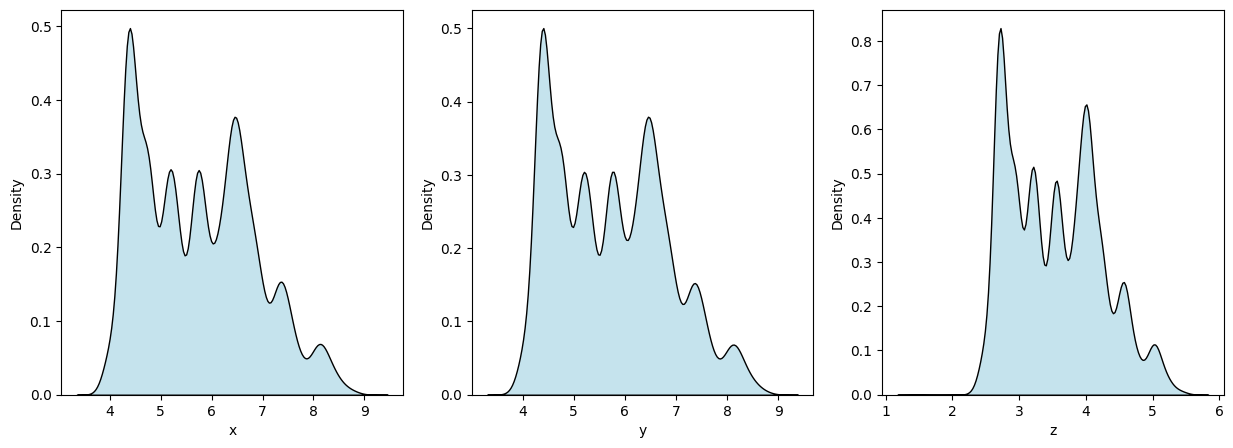

In [ ]:
fig1,axes1 = plt.subplots(1,3,figsize=(15,5))
sns.kdeplot(dataset["x"] , fill = True , color = "lightblue" , edgecolor = "Black" , alpha = 0.7 , ax = axes1[0])
sns.kdeplot(dataset["y"] , fill = True , color = "lightblue" , edgecolor = "Black" , alpha = 0.7 , ax = axes1[1])
sns.kdeplot(dataset["z"] , fill = True , color = "lightblue" , edgecolor = "Black" , alpha = 0.7 , ax = axes1[2])

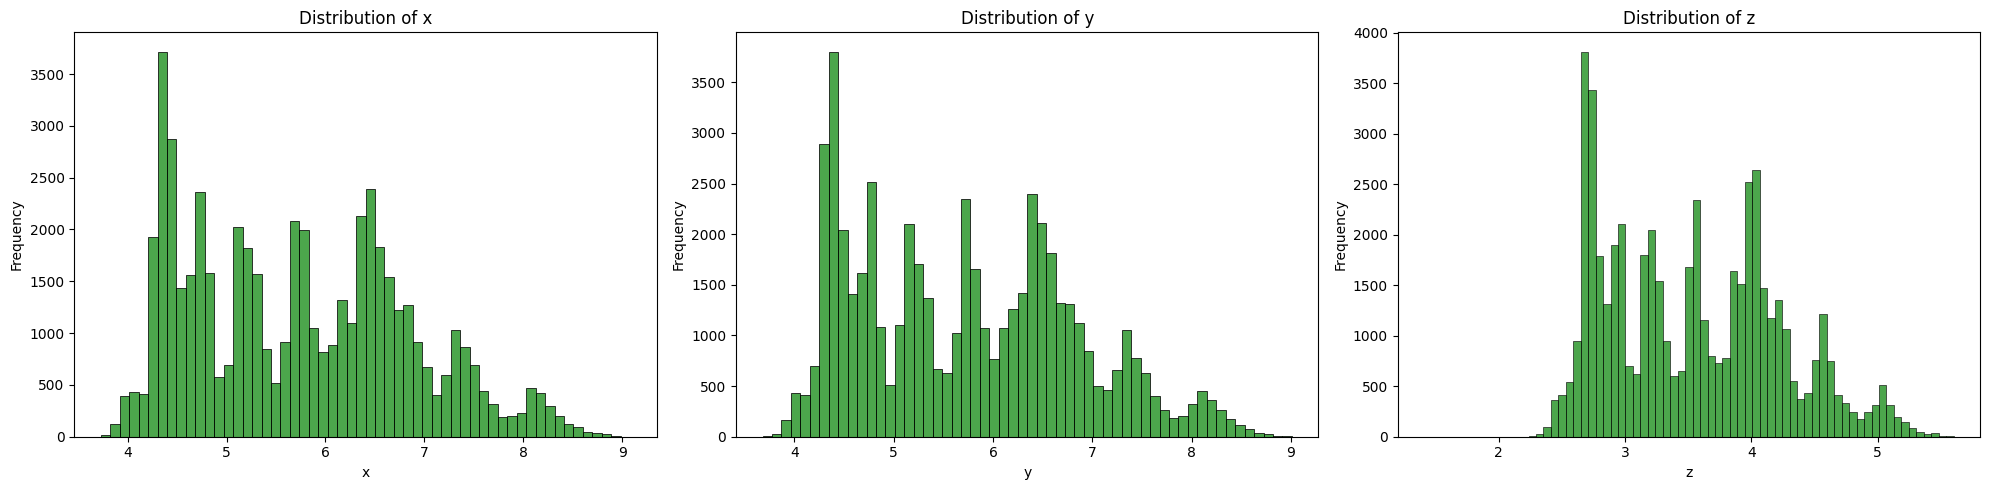

In [ ]:
arr_dimension = ["x","y","z"]
fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))

# Create distribution plots for x, y, and z
for j, i in enumerate(arr_dimension):
    sns.histplot(dataset[i], fill=True, color="green", edgecolor="black", alpha=0.7, ax=axes1[j])
    axes1[j].set_title(f"Distribution of {i}")
    axes1[j].set_xlabel(i)
    axes1[j].set_ylabel('Frequency')
# Adjust layout
plt.tight_layout()
plt.show()

>>Now data looks more clean and without outlier.

>>Good for our ML models.

In [ ]:
dataset.shape

(53703, 10)

53845 - 53703 = 142 rows dropped.

**Draw the correlation graph**

<Axes: >

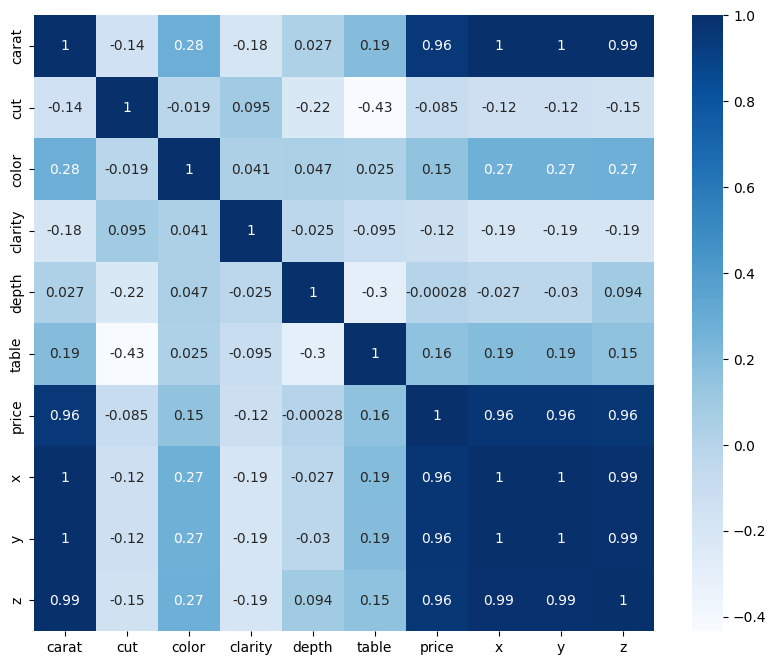

In [ ]:
cmap = sns.diverging_palette(80,20, as_cmap=True)
corr= dataset.corr()
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='Blues',annot=True)

Linear regression - With the help of correlation graph we can observe that the data is not linear (correlation is worse)

In [ ]:
# Splitting the data and target
x = dataset.drop('price', axis =1)
y = dataset['price']

 >> ### Test test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=21)

In [ ]:
# Building pipelins.

pipeline_dt=Pipeline([("ss1",StandardScaler()),
                     ("decision",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("ss2",StandardScaler()),
                     ("random",RandomForestRegressor())])


pipeline_kn=Pipeline([("ss3",StandardScaler()),
                     ("kneighbors",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("ss4",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of the pipelines
pipelines = [pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Pipeliline model names
pipe_dict = {0: "DecisionTree", 1: "RandomForest",2: "KNeighbors", 3: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [ ]:
cv_results = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=11)
    cv_results.append(cv_score)
    print(f"{pipe_dict[i]} --->  {cv_score.mean()}")

DecisionTree --->  -0.12643568888537704
RandomForest --->  -0.09204921528326898
KNeighbors --->  -0.14551220914888247
XGBRegressor --->  -0.0891608057606843


>>**XGB Regressor**

In [ ]:
pred = pipeline_xgb.predict(x_test)

# Accuracy on train data
accuracy_xgb_train = pipeline_xgb.score(x_train, y_train)
print(f"Accuracy on train data: {accuracy_xgb_train*100}")

# Accuracy on test data
accuracy_xgb_test = pipeline_xgb.score(x_test, y_test)
print(f"Accuracy on test data: {accuracy_xgb_test*100}")

Accuracy on train data: 99.44884007419473
Accuracy on test data: 99.22546872826588


>> **Random forest regressor**

In [ ]:
pred1 = pipeline_rf.predict(x_test)

# Accuracy on train data
accuracy_rf_train = pipeline_rf.score(x_train, y_train)
print(f"Accuracy on train data: {accuracy_rf_train*100}")

# Accuracy on test data
accuracy_rf_test = pipeline_rf.score(x_test, y_test)
print(f"Accuracy on test data: {accuracy_rf_test*100}")

Accuracy on train data: 99.88493167001945
Accuracy on test data: 99.20016241922238


The XGB Regressor have better accuracy for this dataset.

It also less **overfit** the data as compared to Random Forest Regressor

**So we will choose XGB Regressor as our model**